In [1]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
import keras
from keras.utils import plot_model
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import IPython
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import visualkeras

In [2]:
df = pd.read_csv("Hurricanes2.csv")
df =df.dropna()

In [3]:
print (df)

df.pop("Hurricane")

                 time    lon   lat         slp     airsfc    pr_wtr  \
158        1980-06-07    0.0  90.0  1007.98004  267.14000  6.160004   
159        1980-06-08    0.0  90.0  1008.22003  269.63000  7.720001   
160        1980-06-09    0.0  90.0  1010.36005  265.36000  9.940002   
161        1980-06-10    0.0  90.0  1010.45000  272.27002  9.220001   
162        1980-06-11    0.0  90.0  1009.39000  270.80000  4.820007   
...               ...    ...   ...         ...        ...       ...   
165101467  2022-12-27  357.5 -90.0   977.55005  251.40000  1.100006   
165101468  2022-12-28  357.5 -90.0   981.80005  249.14000  0.869995   
165101469  2022-12-29  357.5 -90.0   983.10004  249.09000  0.850006   
165101470  2022-12-30  357.5 -90.0   985.34000  246.56000  0.809998   
165101471  2022-12-31  357.5 -90.0   984.73004  248.43000  0.820007   

             rhumsfc       trpp      uwnd      vwnd       trpt  Hurricane  
158        74.550000  351.71106  4.429993  1.759994  229.15000         

158          0
159          0
160          0
161          0
162          0
            ..
165101467    0
165101468    0
165101469    0
165101470    0
165101471    0
Name: Hurricane, Length: 163440576, dtype: int64

In [4]:
df = df.groupby(["lon", "lat"])

In [5]:
dfs = {}
for name, data in df:
    dfs.update({str(data["lon"].values[0]) + "," + str(data["lat"].values[0]) : data})

In [6]:
print (dfs.get("282.5,22.5"))

                 time    lon   lat         slp     airsfc     pr_wtr  \
129983014  1980-06-07  282.5  22.5  1016.23004  299.95000  42.350006   
129983015  1980-06-08  282.5  22.5  1016.77000  301.28998  49.030000   
129983016  1980-06-09  282.5  22.5  1014.98004  301.41000  48.649994   
129983017  1980-06-10  282.5  22.5  1013.78000  302.56000  47.869995   
129983018  1980-06-11  282.5  22.5  1015.86005  302.47000  53.260010   
...               ...    ...   ...         ...        ...        ...   
129998557  2022-12-27  282.5  22.5  1017.82000  297.27002  40.410004   
129998558  2022-12-28  282.5  22.5  1018.51000  297.14000  42.309998   
129998559  2022-12-29  282.5  22.5  1019.50000  297.55000  37.269990   
129998560  2022-12-30  282.5  22.5  1019.21000  297.96000  34.950012   
129998561  2022-12-31  282.5  22.5  1018.45000  298.19000  33.410004   

             rhumsfc        trpp      uwnd      vwnd       trpt  
129983014  75.770004  188.851680 -5.649994 -0.339996  217.95001  
129

In [7]:
dfex = dfs.get("282.5,22.5")
date_time = pd.to_datetime(dfex.pop("time"), format='%Y-%m-%d')
print (dfex)

             lon   lat         slp     airsfc     pr_wtr    rhumsfc  \
129983014  282.5  22.5  1016.23004  299.95000  42.350006  75.770004   
129983015  282.5  22.5  1016.77000  301.28998  49.030000  79.319990   
129983016  282.5  22.5  1014.98004  301.41000  48.649994  77.240005   
129983017  282.5  22.5  1013.78000  302.56000  47.869995  74.369995   
129983018  282.5  22.5  1015.86005  302.47000  53.260010  78.830000   
...          ...   ...         ...        ...        ...        ...   
129998557  282.5  22.5  1017.82000  297.27002  40.410004  76.440000   
129998558  282.5  22.5  1018.51000  297.14000  42.309998  75.160000   
129998559  282.5  22.5  1019.50000  297.55000  37.269990  79.240005   
129998560  282.5  22.5  1019.21000  297.96000  34.950012  79.920000   
129998561  282.5  22.5  1018.45000  298.19000  33.410004  76.390000   

                 trpp      uwnd      vwnd       trpt  
129983014  188.851680 -5.649994 -0.339996  217.95001  
129983015  170.575070 -7.040008  3.02

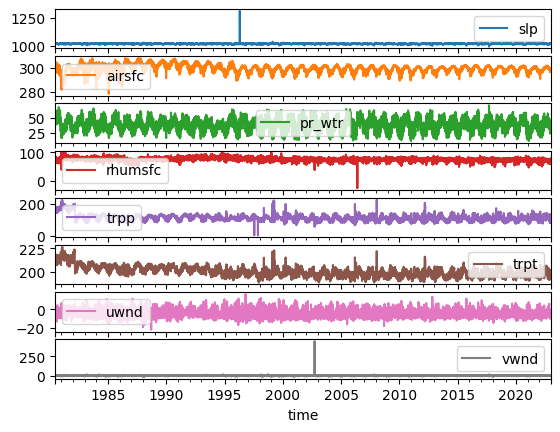

In [8]:
plot_cols = ['slp', 'airsfc', 'pr_wtr', 'rhumsfc', 'trpp', 'trpt', 'uwnd', 'vwnd']
plot_features = dfex[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [9]:
dfex.describe().transpose()
dfex.pop("lon")
dfex.pop("lat")

129983014    22.5
129983015    22.5
129983016    22.5
129983017    22.5
129983018    22.5
             ... 
129998557    22.5
129998558    22.5
129998559    22.5
129998560    22.5
129998561    22.5
Name: lat, Length: 15548, dtype: float64

In [10]:
print (dfex)

                  slp     airsfc     pr_wtr    rhumsfc        trpp      uwnd  \
129983014  1016.23004  299.95000  42.350006  75.770004  188.851680 -5.649994   
129983015  1016.77000  301.28998  49.030000  79.319990  170.575070 -7.040008   
129983016  1014.98004  301.41000  48.649994  77.240005  166.015620 -4.699997   
129983017  1013.78000  302.56000  47.869995  74.369995  163.642700 -1.449997   
129983018  1015.86005  302.47000  53.260010  78.830000  162.423460 -0.990005   
...               ...        ...        ...        ...         ...       ...   
129998557  1017.82000  297.27002  40.410004  76.440000   88.195430 -2.899994   
129998558  1018.51000  297.14000  42.309998  75.160000   90.729530 -2.960007   
129998559  1019.50000  297.55000  37.269990  79.240005   87.262054 -5.550003   
129998560  1019.21000  297.96000  34.950012  79.920000   85.315990 -6.279999   
129998561  1018.45000  298.19000  33.410004  76.390000   82.664980 -6.970001   

               vwnd       trpt  
129983

In [11]:
dfex.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
slp,15548.0,1015.927104,3.509639,990.450000,1014.350040,1015.970030,1017.522500,1309.72000
airsfc,15548.0,299.662661,2.970094,278.450000,297.750000,299.984990,301.440000,308.32000
pr_wtr,15548.0,38.239651,9.683969,10.700012,30.897499,38.354996,45.679993,71.42999
rhumsfc,15548.0,75.108843,5.986178,-25.019989,71.940000,75.119995,78.530000,99.00000
trpp,15548.0,111.708134,19.815473,1.071700,97.454331,110.284688,121.953919,228.00438
uwnd,15548.0,-5.218721,3.672707,-22.300003,-7.740005,-5.715004,-3.240006,16.34999
vwnd,15548.0,-0.779272,4.743061,-18.470001,-2.600006,-0.479996,1.179993,447.96997
trpt,15548.0,200.220418,5.085145,189.000000,196.510010,199.540010,202.989990,226.46000


In [12]:
dfex.loc[dfex.idxmax()["slp"], "slp"] = 1015.927
dfex.loc[dfex.idxmax()["vwnd"], "vwnd"]= -0.7792724
dfex.loc[dfex.idxmin()["rhumsfc"], "rhumsfc"]= 75.108843

In [13]:
dfex.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
slp,15548.0,1015.908208,2.601034,990.450000,1014.350040,1015.970030,1017.520000,1034.900000
airsfc,15548.0,299.662661,2.970094,278.450000,297.750000,299.984990,301.440000,308.320000
pr_wtr,15548.0,38.239651,9.683969,10.700012,30.897499,38.354996,45.679993,71.429990
rhumsfc,15548.0,75.115283,5.932067,37.829987,71.940000,75.119995,78.530000,99.000000
trpp,15548.0,111.708134,19.815473,1.071700,97.454331,110.284688,121.953919,228.004380
uwnd,15548.0,-5.218721,3.672707,-22.300003,-7.740005,-5.715004,-3.240006,16.349990
vwnd,15548.0,-0.808135,3.089187,-18.470001,-2.600006,-0.479996,1.179993,16.149994
trpt,15548.0,200.220418,5.085145,189.000000,196.510010,199.540010,202.989990,226.460000


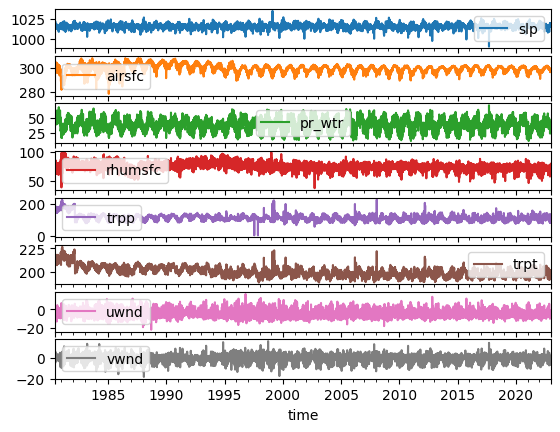

In [14]:
plot_cols = ['slp', 'airsfc', 'pr_wtr', 'rhumsfc', 'trpp', 'trpt', 'uwnd', 'vwnd']
plot_features = dfex[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [15]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

#dfex['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
#dfex['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
#dfex['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
#dfex['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


In [16]:
column_indices = {name: i for i, name in enumerate(dfex.columns)}

n = len(dfex)
train_df = dfex[0:int(n*0.7)]
val_df = dfex[int(n*0.7):int(n*0.9)]
test_df = dfex[int(n*0.9):]

num_features = dfex.shape[1]


In [17]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\samue\AppData\Local\Temp\ipykernel_19956\2536843180.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(dfex.keys(), rotation=90)


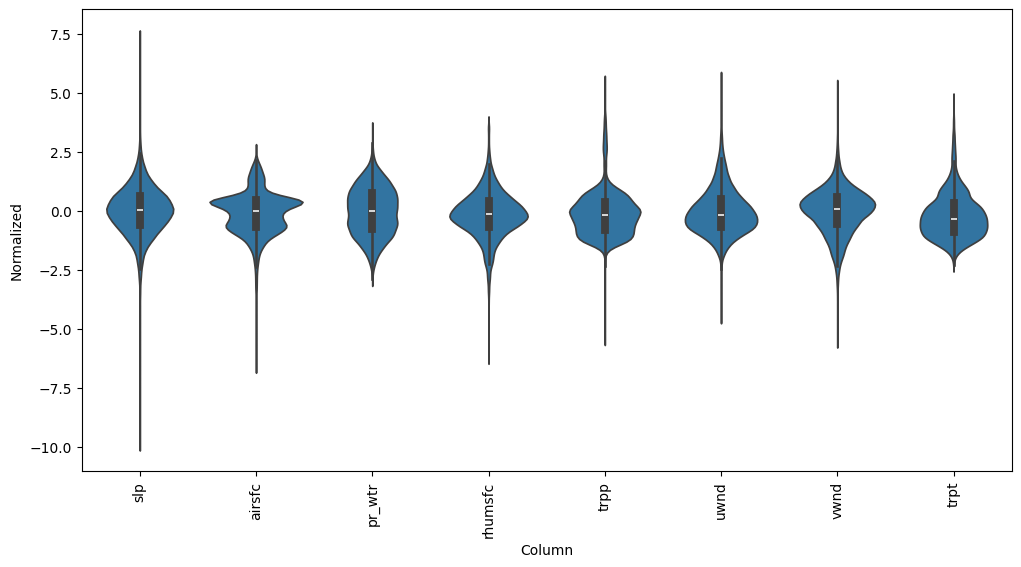

In [18]:
df_std = (dfex - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(dfex.keys(), rotation=90)


In [19]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])


In [20]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['slp'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['slp']

In [21]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['slp'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['slp']

In [22]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [23]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


In [24]:
def plot(self, model=None, plot_col='slp', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.xlim(1500, 2190)
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [day]')

WindowGenerator.plot = plot

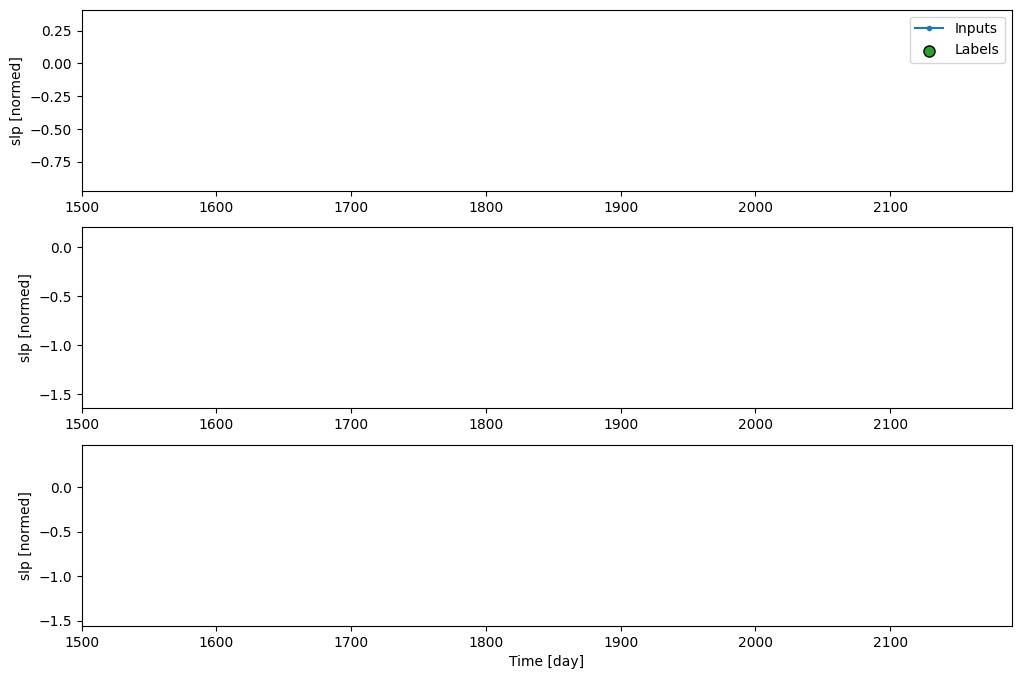

In [25]:
w2.example = example_inputs, example_labels
w2.plot()


In [26]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [27]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    result = getattr(self, '_example', None)
    if result is None:
    # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
    # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [28]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [29]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)


Total window size: 2190
Input indices: [   0    1    2 ... 1822 1823 1824]
Label indices: [1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838
 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852
 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866
 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 20

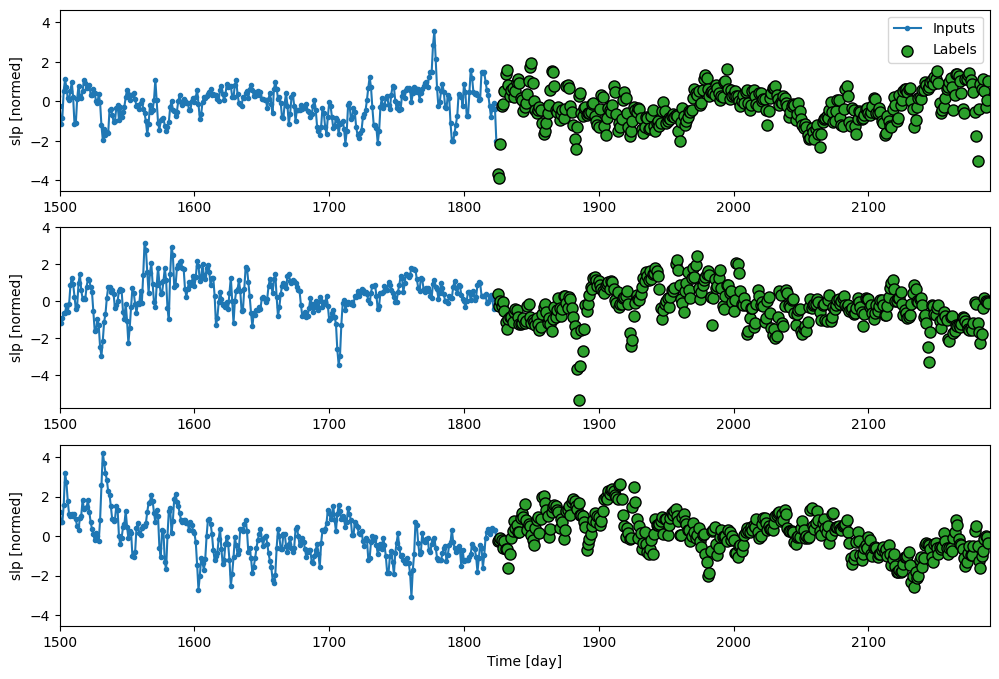

In [53]:
OUT_STEPS = 365
multi_window = WindowGenerator(input_width=1825,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [31]:
multi_val_performance = {}
multi_performance = {}
MAX_EPOCHS = 20


In [50]:
def compile_and_fit(model, window, patience=5):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min', restore_best_weights=True)

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

Epoch 1/20
272/272 [==============================] - 22s 77ms/step - loss: 0.6539 - mean_absolute_error: 0.6048 - val_loss: 0.5279 - val_mean_absolute_error: 0.5285
Epoch 2/20
272/272 [==============================] - 20s 75ms/step - loss: 0.5665 - mean_absolute_error: 0.5507 - val_loss: 0.5212 - val_mean_absolute_error: 0.5243
Epoch 3/20
272/272 [==============================] - 21s 76ms/step - loss: 0.5480 - mean_absolute_error: 0.5399 - val_loss: 0.5369 - val_mean_absolute_error: 0.5347
Epoch 4/20
272/272 [==============================] - 20s 75ms/step - loss: 0.5619 - mean_absolute_error: 0.5501 - val_loss: 0.5154 - val_mean_absolute_error: 0.5210
Epoch 5/20
272/272 [==============================] - 20s 74ms/step - loss: 0.5431 - mean_absolute_error: 0.5381 - val_loss: 0.5135 - val_mean_absolute_error: 0.5198
Epoch 6/20
272/272 [==============================] - 21s 76ms/step - loss: 0.5349 - mean_absolute_error: 0.5328 - val_loss: 0.5157 - val_mean_absolute_error: 0.5209
Epoc

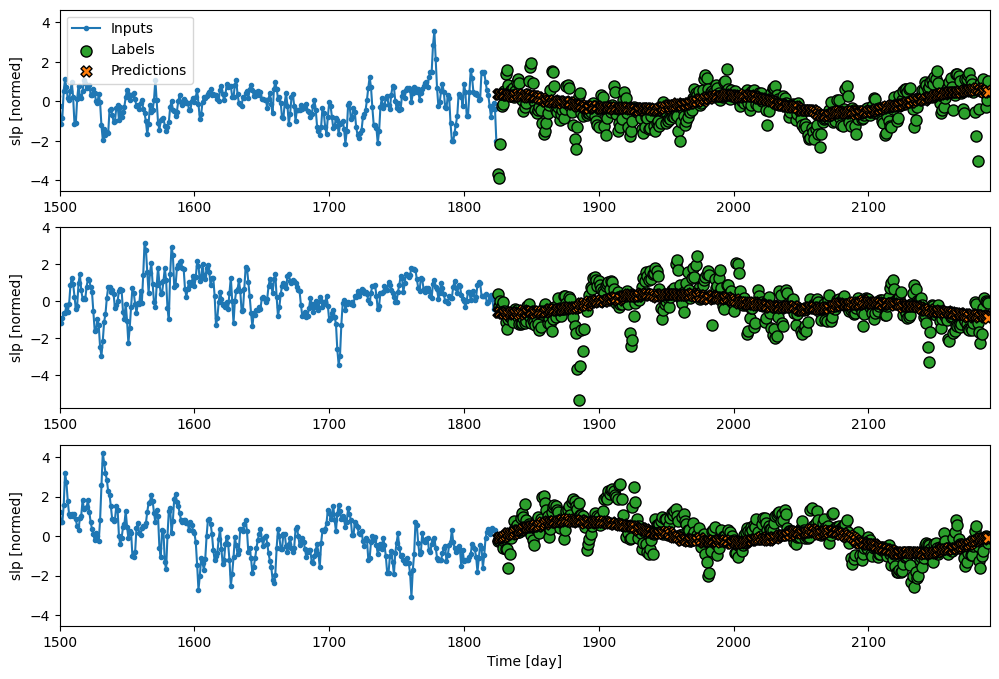

In [55]:
CONV_WIDTH = 3

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
   
    tf.keras.layers.Dense(512, activation='relu'),
   
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation="relu"),

    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


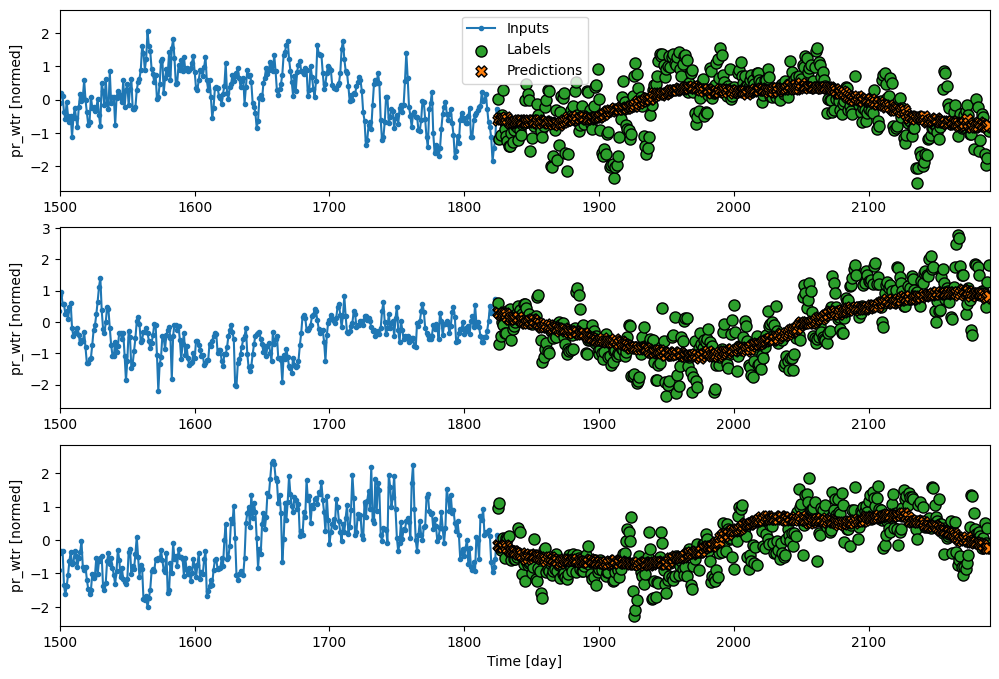

In [65]:
multi_window.plot(multi_lstm_model, plot_col = "pr_wtr")

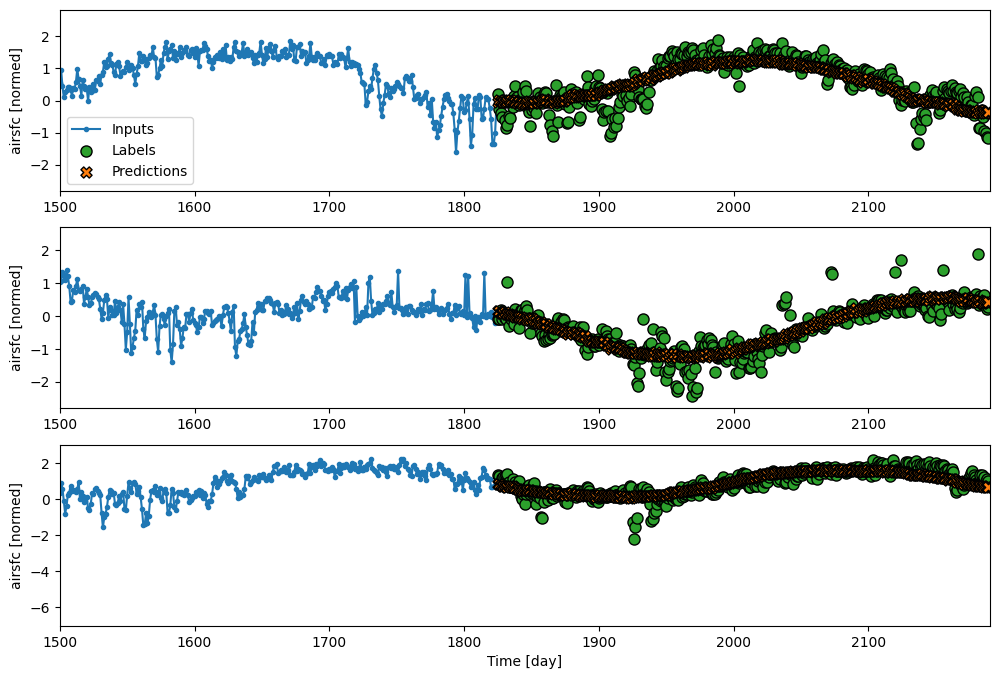

In [66]:
multi_window.plot(multi_lstm_model, plot_col = "airsfc")

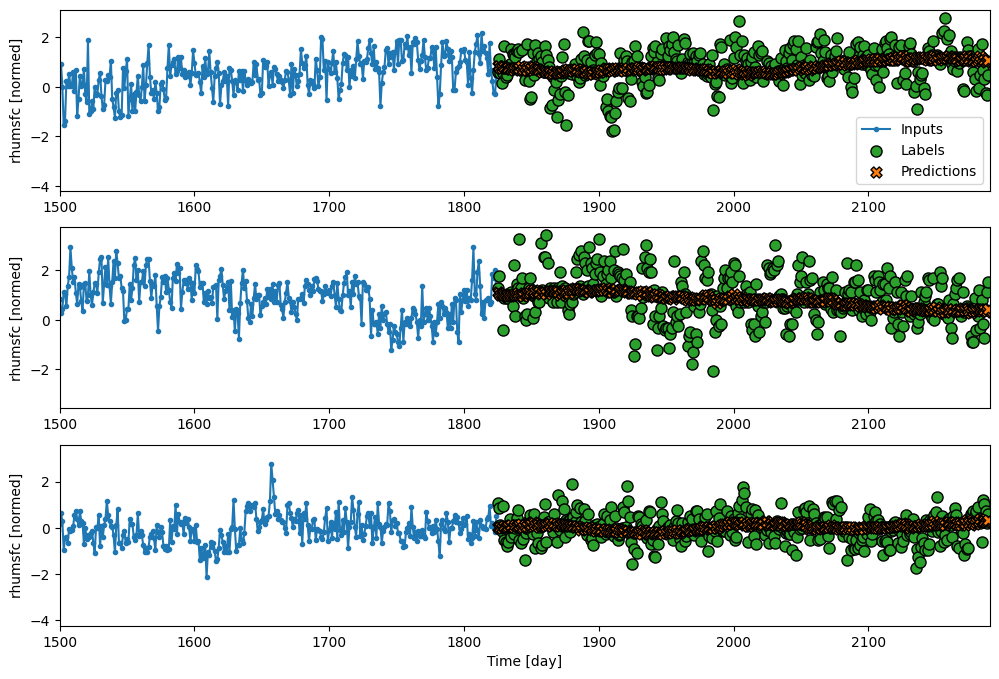

In [67]:
multi_window.plot(multi_lstm_model, plot_col = "rhumsfc")

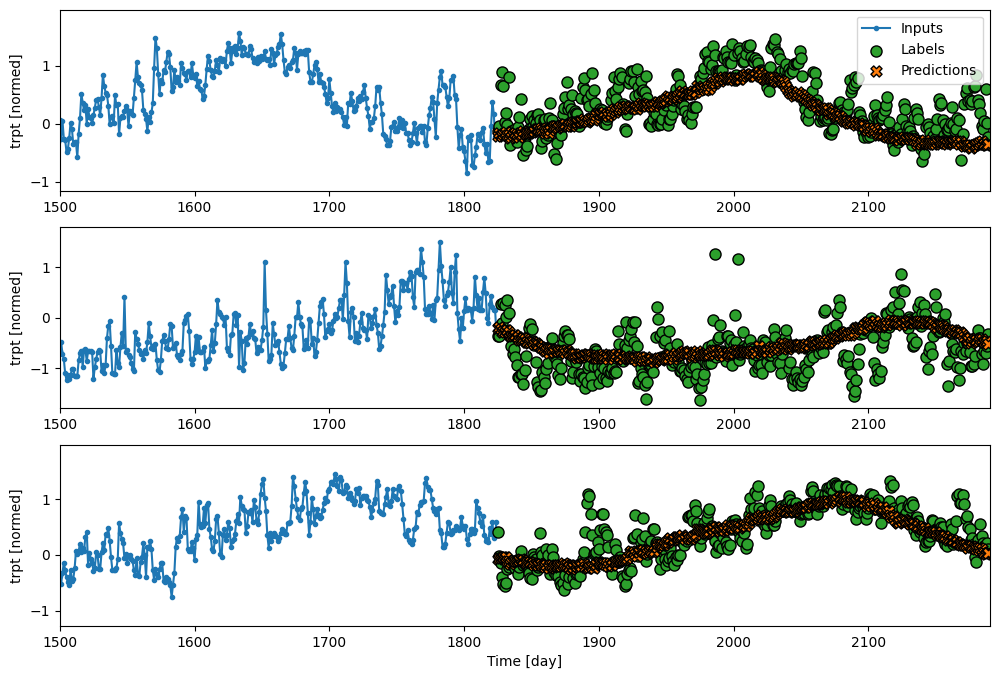

In [68]:
multi_window.plot(multi_lstm_model, plot_col = "trpt")

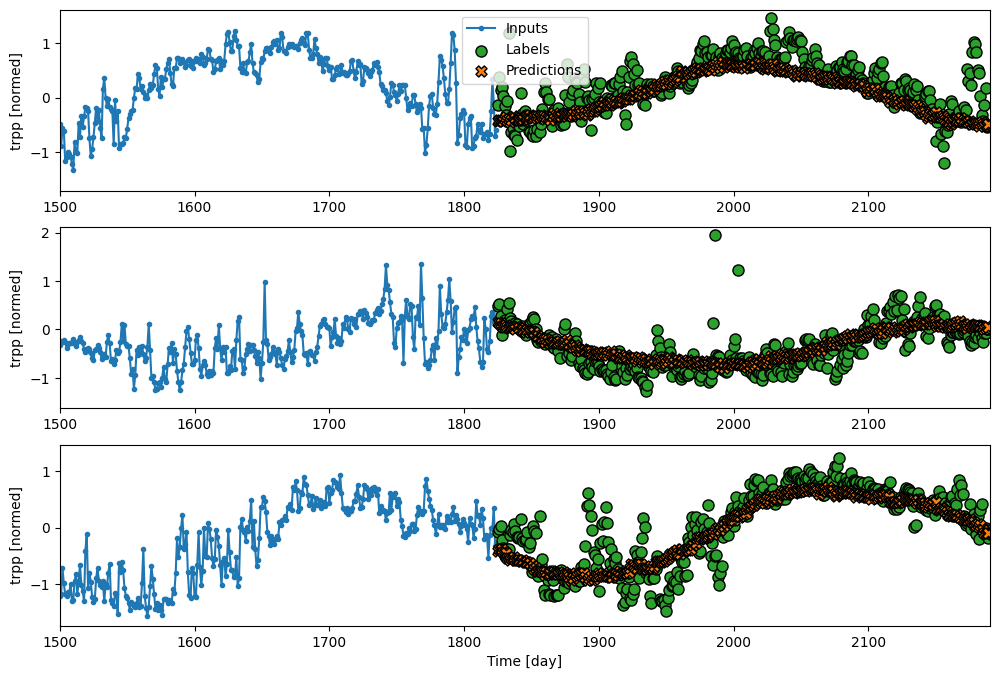

In [69]:
multi_window.plot(multi_lstm_model, plot_col = "trpp")

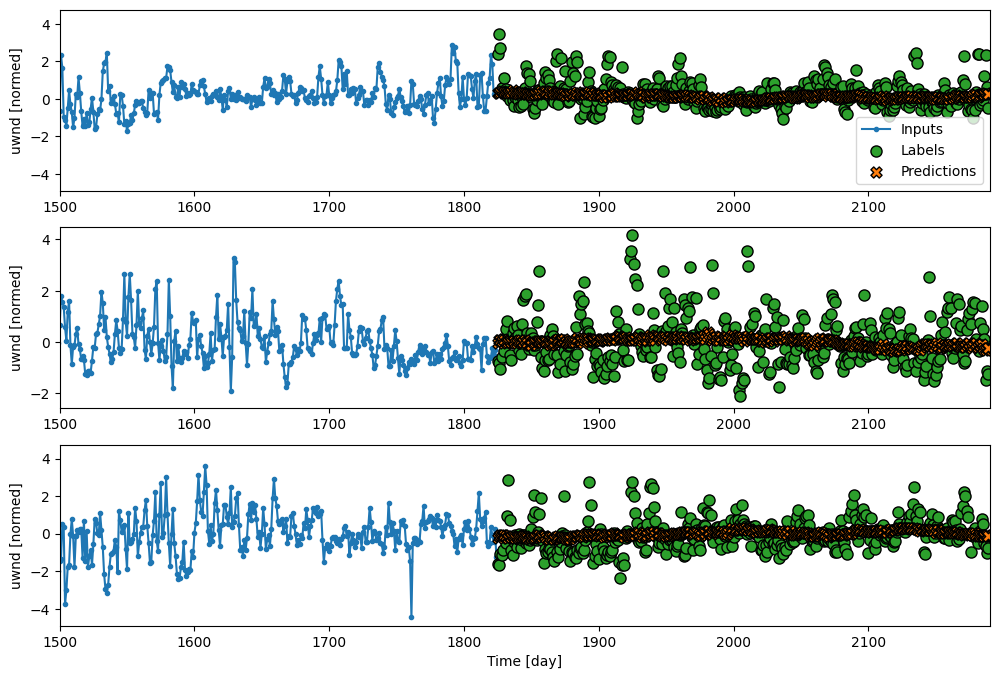

In [70]:
multi_window.plot(multi_lstm_model, plot_col = "uwnd")

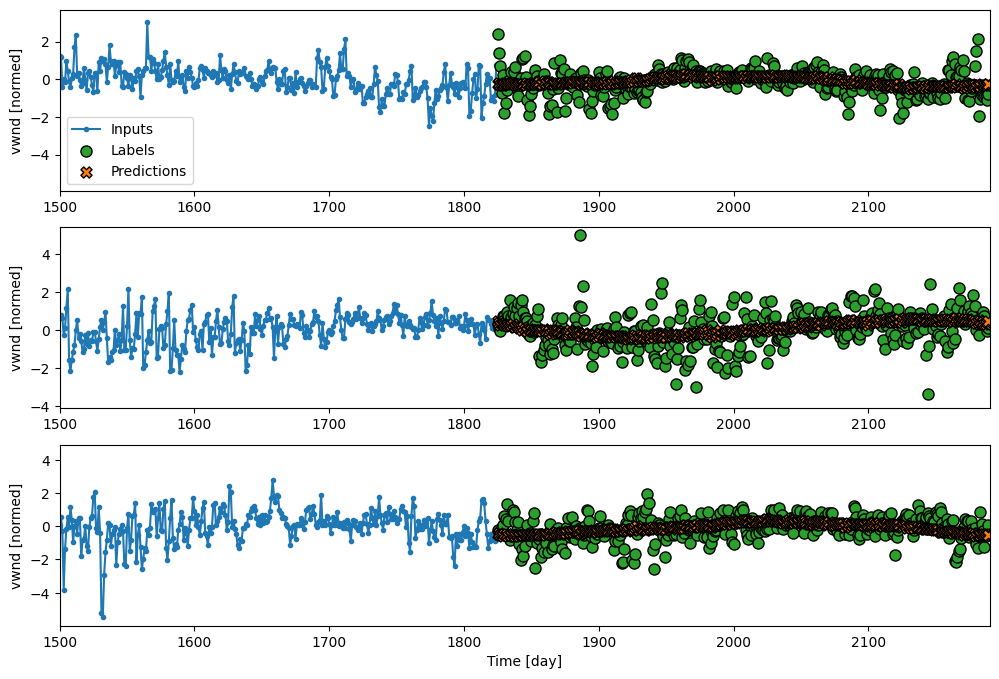

In [71]:
multi_window.plot(multi_lstm_model, plot_col = "vwnd")

In [63]:
#multi_lstm_model.save("LSTMnew.keras")

In [56]:
#import visualkeras

In [59]:
#visualkeras.layered_view(multi_lstm_model, legend = True)

TypeError: 'int' object is not iterable